**ALUNOS:** MARCO RYAN MARASSI MARQUES (14221, marco.ryan@aedb.br), LUCAS MATHEUS DA SILVA (12866,
lucas.silva1@aedb.br), LUCAS ARÍSIO MÜLLER (12702, lucas.arisio@aedb.br), JOÃO VICTOR BATISTA DE
VASCONCELOS (10252, joaov.vasconcelos@aedb.br)

# **Carregamento e Pré-processamento do Dataset**

In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

split_index = int(0.8 * len(x_train))
x_train_split, x_val_split = x_train[:split_index], x_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]

# **Construção e Treinamento do Modelo KNN**

In [3]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

split_index = int(0.8 * len(x_train))
x_train_split, x_val_split = x_train[:split_index], x_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]


x_train_reshaped = x_train_split.reshape(x_train_split.shape[0], -1)
x_val_reshaped = x_val_split.reshape(x_val_split.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

k_values = [1, 3, 5, 7, 10]
for k in k_values:

  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train_reshaped, y_train_split)

  y_pred = knn.predict(x_val_reshaped)

  accuracy = accuracy_score(y_val_split, y_pred)
  print(f"Acurácia para k = {k}: {accuracy}")

best_k = 5
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train_reshaped, y_train_split)

y_pred_test = knn_final.predict(x_test_reshaped)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\nAcurácia no conjunto de teste (k = {best_k}): {accuracy_test}")

Acurácia para k = 1: 0.84875
Acurácia para k = 3: 0.8531666666666666
Acurácia para k = 5: 0.852
Acurácia para k = 7: 0.8545
Acurácia para k = 10: 0.8516666666666667

Acurácia no conjunto de teste (k = 5): 0.8491


# **Avaliação do Modelo**


Acurácia no conjunto de teste (k = 5): 0.8491


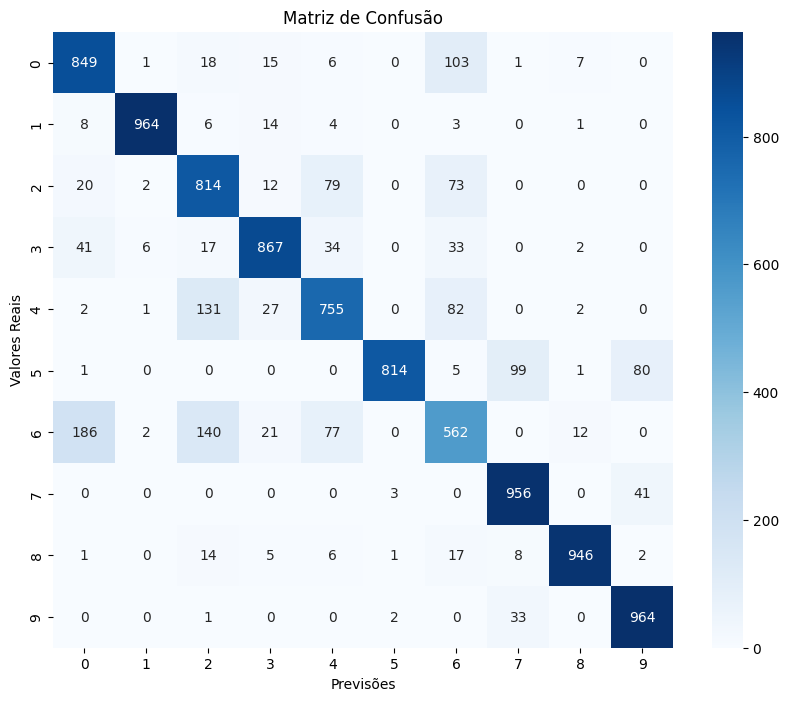

In [4]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

split_index = int(0.8 * len(x_train))
x_train_split, x_val_split = x_train[:split_index], x_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]

x_train_reshaped = x_train_split.reshape(x_train_split.shape[0], -1)
x_val_reshaped = x_val_split.reshape(x_val_split.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)


best_k = 5
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train_reshaped, y_train_split)

y_pred_test = knn_final.predict(x_test_reshaped)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\nAcurácia no conjunto de teste (k = {best_k}): {accuracy_test}")

conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()